# Imports and variable definitions

In [86]:
#Imports
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.table import Table, hstack, Column 
import csv
import pandas as pd
import astropy.coordinates as apycoords
#from astropy.coordinates import SkyCoord

In [87]:
#Load combined catalog
path = '/Users/minathoresen/Desktop/JPL_summer_research/CH2O_CMZoom/'
combined_catalog = Table.read(path+'combo_catalog_w_fit_quality.fits') 
print(combined_catalog.keys())

['index', 'area_ellipse', 'area_exact', 'flux_integrated', 'major_sigma', 'minor_sigma', 'position_angle', 'radius', 'glon', 'glat', 'r_eff', 'flux_integrated_bgsub', 'min_flux_integrated', 'noise', 'peak_cont_flux', 'min_cont_flux', 'mean_cont_flux', 'npix', 'DustTemperature', 'herschel_column', 'mass', 'sma_column', 'r_eff_pc', 'Sigma', 'n', 'rho', 'tff', 'glon_0', 'mass_bgsub', 'suspicious', 'leaf_ID', 'mask_num', 'mass_unc', 'N_unc', 'n_unc', 'rho_unc', 'tff_unc', 'mass_bgsub_unc', 'atoll_final_say', 'SF_final_say', '8um_point_hph', '20-24um_point_hph', '70um_point_hph', 'YSO_hph', 'Walsh+2014_h2o_maser_hph', 'Caswell+2012_methanol_maser_hph', 'Gutermuth+2015_24um_point_hph', 'Molinari+2016_70um_point_hph', 'SF_any_all_hph', 'SF_any_certain_hph', '8um_point_brian', '20-24um_point_brian', '70um_point_brian', 'YSO_brian', 'Walsh+2014_h2o_maser_brian', 'Caswell+2012_methanol_maser_brian', 'Gutermuth+2015_24um_point_brian', 'Molinari+2016_70um_point_brian', 'SF_any_all_brian', 'SF_any_

In [88]:
#Define variables and conditions
Tk = combined_catalog['h2co_Tk_0']
Tk1 = combined_catalog['h2co_Tk_1']
Tk_1 = combined_catalog['h2co_Tk_-1']
Tk2 = combined_catalog['h2co_Tk_2']
Tk_2= combined_catalog['h2co_Tk_-2']
Tk3 = combined_catalog['h2co_Tk_3']
Tk_3 = combined_catalog['h2co_Tk_-3']
N = combined_catalog['h2co_N_0']
N1 = combined_catalog['h2co_N_1']
N_1 = combined_catalog['h2co_N_-1']
N2 = combined_catalog['h2co_N_2']
N_2 = combined_catalog['h2co_N_-2']
N3 = combined_catalog['h2co_N_3']
N_3 = combined_catalog['h2co_N_-3']
nh2co = combined_catalog['h2co_n_0']
nh2co1 = combined_catalog['h2co_n_1']
nh2co_1 = combined_catalog['h2co_n_-1']
nh2co2 = combined_catalog['h2co_n_2']
nh2co_2 = combined_catalog['h2co_n_-2']
nh2co3 = combined_catalog['h2co_n_3']
nh2co_3 = combined_catalog['h2co_n_-3']
vlsr = combined_catalog['h2co_vlsr_0']
vlsr1 = combined_catalog['h2co_vlsr_1']
vlsr_1 = combined_catalog['h2co_vlsr_-1']
vlsr2 = combined_catalog['h2co_vlsr_2']
vlsr_2 = combined_catalog['h2co_vlsr_-2']
vlsr3 = combined_catalog['h2co_vlsr_3']
vlsr_3 = combined_catalog['h2co_vlsr_-3']
vlsr_from_new_fits = combined_catalog['vlsr_from_fit_quality']

mass = combined_catalog['mass'] 
mass_unc = combined_catalog['mass_unc']
radius = combined_catalog['r_eff'] #no uncertainties
ncatalog = combined_catalog['n']
ncatalog_unc = combined_catalog['n_unc']
Tdust = combined_catalog['DustTemperature'] #no uncertainties
Ncatalog = combined_catalog['sma_column'] #no uncertainties

Tk_unc_pos1 = Tk1-Tk
Tk_unc_neg1 = Tk-Tk_1
N_unc_pos1 = N1-N
N_unc_neg1 = N-N_1
n_unc_pos1 = nh2co1-nh2co
n_unc_neg1 = nh2co-nh2co_1
vlsr_unc_pos1 = vlsr1-vlsr
vlsr_unc_neg1 = vlsr-vlsr_1

n_ratio = nh2co/np.log10(ncatalog)
n_diff = np.log10(ncatalog)-nh2co
gas_dust_T_diff = Tk-Tdust
gas_dust_T_ratio = Tk/Tdust

multi_component = (combined_catalog['multi_component_flag']==1)
not_multi_component = (combined_catalog['multi_component_flag']==0)

h2co_detection = (combined_catalog['detection_flag']==1)
h2co_nondetection = (combined_catalog['detection_flag']==0)

good_fit = (combined_catalog['detection_flag']==1)&(combined_catalog['multi_component_flag']==0)

starforming_condition1 = (combined_catalog['SF_final_say'] == 1)
starforming_condition0 = (combined_catalog['SF_final_say'] == 0)
starforming_condition2 = (combined_catalog['SF_final_say'] == 2)

h2co_mask = (combined_catalog['h2co_n_0'] != -1)

glat = combined_catalog['glat']
glon = combined_catalog['glon']

leaf_ID = combined_catalog['leaf_ID']

in_CMZ = (combined_catalog['mask_num']!=27) & (combined_catalog['mask_num']!=13) & (combined_catalog['mask_num']!=17) & (combined_catalog['mask_num']!=33)
out = (combined_catalog['mask_num']==27) & (combined_catalog['mask_num']==13) & (combined_catalog['mask_num']==17) & (combined_catalog['mask_num']==33)

print(len(N[out]))
print(len(N[in_CMZ]))


#points dont match the same order as the original

# print('multi component: ', len(N[multi_component]))
# print('h2co nondetection: ',len(N[h2co_nondetection]))
# print('single component and h2co detection: ', len(N[good_fit]))
# print(leaf_ID[combined_catalog['mask_num']==27])
# print(leaf_ID[combined_catalog['mask_num']==13])
# print(leaf_ID[combined_catalog['mask_num']==17])
# print(leaf_ID[combined_catalog['mask_num']==33])

0
233


In [100]:
low_temp_star_forming = (combined_catalog['h2co_Tk_0']<75) & (combined_catalog['SF_final_say'] == 1)
print(leaf_ID[low_temp_star_forming & good_fit])
print(Tk[low_temp_star_forming & good_fit])
# low_star_forming = low_temp[starforming_condition1]
# print(low_star_forming)
# print(leaf_ID[low_star_forming])
#these might all be non-CMZ sources!

   leaf_ID   
-------------
G0.316-0.201i
G0.316-0.201j
G0.316-0.201h
G0.316-0.201b
G0.316-0.201d
G0.212-0.001a
G0.212-0.001b
    h2co_Tk_0    
        K        
-----------------
34.51074807337487
32.09696730983612
44.24747611699794
28.97707909030438
29.07008637036794
50.14368794693064
63.04257559174407


In [101]:
high_temp_not_star_forming = (combined_catalog['h2co_Tk_0']>150) & (combined_catalog['SF_final_say'] == 0)
print(leaf_ID[high_temp_not_star_forming & h2co_mask & not_multi_component & h2co_detection])
print(Tk[high_temp_not_star_forming & h2co_mask & not_multi_component & h2co_detection])

    leaf_ID    
---------------
  G0.106-0.082c
  G0.106-0.082b
G359.889-0.093n
  G0.489+0.010b
  G0.489+0.010k
G359.137+0.031a
  G0.380+0.050c
G359.137+0.031c
    h2co_Tk_0     
        K         
------------------
183.12862489220208
156.54566890287717
  156.803682894205
 208.0534690333324
 173.6311093415863
273.59071333244594
 182.3777218129724
 204.5802998837796


# Case Studies

In [89]:
#using astropy to calculate coordinates in cartesian- 1st 2 points! #dustridge c
Glon1 = -0.3760651010894094*u.deg
Glat1 = -0.24710558434732224*u.deg

Glon2 = -0.3853654338704473*u.deg
Glat2 = -0.24323223654332535*u.deg

# Glon = glon
# Glat = glat

distance= 1.2*u.kpc
c1= apycoords.SkyCoord(Glon1,Glat1,distance=distance,frame='galactic')
c2= apycoords.SkyCoord(Glon2,Glat2,distance=distance,frame='galactic')
c3= apycoords.SkyCoord(glon,glat,distance=distance,frame='galactic')


gc_frame= apycoords.Galactocentric(galcen_distance=8.2*u.kpc,
                                   z_sun=25.*u.pc)
gc = c3.transform_to(gc_frame)
gc.representation_type = 'cartesian'
# print("(x,y,z) in (kpc,kpc,kpc) in right-handed frame")
# print("\t",gc.cartesian) 


# dustridgec_ = (leaf_ID=='G0.380+0.050a' or leaf_ID=='G0.380+0.050b' or leaf_ID=='G0.380+0.050c' or 
# leaf_ID=='G0.380+0.050d' or leaf_ID=='G0.380+0.050e' or leaf_ID=='G0.380+0.050f' or
# leaf_ID=='G0.380+0.050g' or leaf_ID=='G0.380+0.050h')

#define specific conditions
dustridgec_a = (leaf_ID=='G0.380+0.050a')
dustridgec_b = (leaf_ID=='G0.380+0.050b')
dustridgec_c = (leaf_ID=='G0.380+0.050c')
dustridgec_d = (leaf_ID=='G0.380+0.050d')
dustridgec_e = (leaf_ID=='G0.380+0.050e')
dustridgec_f = (leaf_ID=='G0.380+0.050f')
dustridgec_g = (leaf_ID=='G0.380+0.050g')
dustridgec_h = (leaf_ID=='G0.380+0.050h')

# dustridgec = ('G0.380+0.05' in leaf_ID)

# for i in leaf_ID:
#     if 'G0.380+0.05' in i:
#         print(i)
        


#distance
c1.separation_3d(c2) 
#look at dust ridge cloud c G0.380+0.05
# https://galaxiesbook.org/chapters/A.-Coordinate-systems.html

<Distance 0.000211 kpc>

In [90]:
#find star forming status for each source #dustridge c
# print(combined_catalog['SF_final_say'][dustridgec_a])
# print(combined_catalog['SF_final_say'][dustridgec_b])
# print(combined_catalog['SF_final_say'][dustridgec_c])
# print(combined_catalog['SF_final_say'][dustridgec_d])
# print(combined_catalog['SF_final_say'][dustridgec_e])
# print(combined_catalog['SF_final_say'][dustridgec_f])
# print(combined_catalog['SF_final_say'][dustridgec_g])
# print(combined_catalog['SF_final_say'][dustridgec_h])

#calculate distances to star forming source (source a)
ca = apycoords.SkyCoord(glon[dustridgec_a],glat[dustridgec_a],distance=distance,frame='galactic')
cb = apycoords.SkyCoord(glon[dustridgec_b],glat[dustridgec_b],distance=distance,frame='galactic')
cc = apycoords.SkyCoord(glon[dustridgec_c],glat[dustridgec_c],distance=distance,frame='galactic')
cd = apycoords.SkyCoord(glon[dustridgec_d],glat[dustridgec_d],distance=distance,frame='galactic')
ce = apycoords.SkyCoord(glon[dustridgec_e],glat[dustridgec_e],distance=distance,frame='galactic')
cf = apycoords.SkyCoord(glon[dustridgec_f],glat[dustridgec_f],distance=distance,frame='galactic')
cg = apycoords.SkyCoord(glon[dustridgec_g],glat[dustridgec_g],distance=distance,frame='galactic')
ch = apycoords.SkyCoord(glon[dustridgec_h],glat[dustridgec_h],distance=distance,frame='galactic')


gc_frame= apycoords.Galactocentric(galcen_distance=8.2*u.kpc,
                                   z_sun=25.*u.pc)
gc.representation_type = 'cartesian'


# #print distances to star forming source
# print(ca.separation_3d(ca)) 
# print(ca.separation_3d(cb)) 
# print(ca.separation_3d(cc))
# print(ca.separation_3d(cd))
# print(ca.separation_3d(ce))
# print(ca.separation_3d(cf))
# print(ca.separation_3d(cg))
# print(ca.separation_3d(ch))

# #print formaldehyde temps
# print(Tk[dustridgec_a])
# print(Tk[dustridgec_b])
# print(Tk[dustridgec_c])
# print(Tk[dustridgec_d])
# print(Tk[dustridgec_e])
# print(Tk[dustridgec_f])
# print(Tk[dustridgec_g])
# print(Tk[dustridgec_h])

# dustridgec_dist = [0, 9.11656698e-05, 0.0003247, 0.00026226, 0.00036692, 8.78179195e-05, 5.0589749e-05, 5.59119184e-05] 
# dustridgec_gastemp = [200.34, 57.51, 184.58, 154.25, 21.87, 115.43, 54.82, 46.77]

# fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

# ax.scatter(dustridgec_dist, dustridgec_gastemp, s=100)
# plt.xlabel('Distance to star forming source (kpc)', fontsize = 22, weight='bold')
# plt.ylabel('h2co Tk (K)', fontsize = 22, weight='bold')
# plt.title('Temperature vs distance to star forming \nsource for dust ridge cloud c', fontsize = 22, weight='bold')
# ax.tick_params(axis='x',labelsize=14)
# ax.tick_params(axis='y',labelsize=16)


ValueError: 'yerr' (shape: (2, 1, 1)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (1, 1))

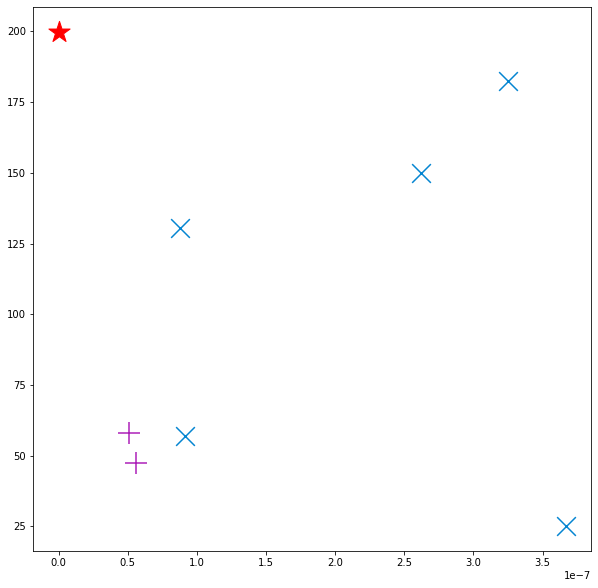

In [68]:
#dust ridge cloud c gas temp poster plot
#print distances to star forming source
# print(ca.separation_3d(ca), ca.separation_3d(cb), ca.separation_3d(cc), ca.separation_3d(cd),ca.separation_3d(ce), ca.separation_3d(cf), ca.separation_3d(cg), ca.separation_3d(ch))

#print formaldehyde temps
# print(Tk[dustridgec_a], Tk[dustridgec_b], Tk[dustridgec_c], Tk[dustridgec_d], Tk[dustridgec_e], Tk[dustridgec_f], Tk[dustridgec_g], Tk[dustridgec_h])

dustridgec_dist1 = [ca.separation_3d(ca)/1000]
dustridgec_gastemp1 = [Tk[dustridgec_a]]
dustridgec_gastemp_unc_pos_sf1 = [Tk_unc_pos1[dustridgec_a]]
dustridgec_gastemp_unc_neg_sf1 = [Tk_unc_neg1[dustridgec_a]]

dustridgec_dist0 = [ca.separation_3d(cb)/1000, ca.separation_3d(cc)/1000, ca.separation_3d(cd)/1000,
                   ca.separation_3d(ce)/1000, ca.separation_3d(cf)/1000]
dustridgec_gastemp0 = [Tk[dustridgec_b], Tk[dustridgec_c], Tk[dustridgec_d], Tk[dustridgec_e], Tk[dustridgec_f]]
dustridgec_gastemp_unc_pos_nsf1 = [Tk_unc_pos1[dustridgec_b], Tk_unc_pos1[dustridgec_c], Tk_unc_pos1[dustridgec_d], Tk_unc_pos1[dustridgec_e], Tk_unc_pos1[dustridgec_f]]
dustridgec_gastemp_unc_neg_nsf1 = [Tk_unc_neg1[dustridgec_b], Tk_unc_neg1[dustridgec_c], Tk_unc_neg1[dustridgec_d], Tk_unc_neg1[dustridgec_e], Tk_unc_neg1[dustridgec_f]]

dustridgec_dist2 = [ca.separation_3d(cg)/1000, ca.separation_3d(ch)/1000]
dustridgec_gastemp2 = [Tk[dustridgec_g], Tk[dustridgec_h]]
dustridgec_gastemp_unc_pos_asf1 = [Tk_unc_pos1[dustridgec_g],Tk_unc_pos1[dustridgec_h]]
dustridgec_gastemp_unc_neg_asf1 = [Tk_unc_neg1[dustridgec_g],Tk_unc_neg1[dustridgec_h]]
                       
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(dustridgec_dist1, dustridgec_gastemp1, c='red', marker='*', label='Star forming', s=500)
ax.scatter(dustridgec_dist2, dustridgec_gastemp2, c='xkcd:barney', marker='+', label='Ambiguously star forming', s=450)
ax.scatter(dustridgec_dist0, dustridgec_gastemp0, c='xkcd:cerulean', marker='x', label='Not star forming', s=350)

#ERROR BARS NOT WORKING
ax.errorbar(dustridgec_dist1, dustridgec_gastemp1, yerr =[dustridgec_gastemp_unc_neg_sf1, dustridgec_gastemp_unc_pos_sf1], c='red', ls='none')
ax.errorbar(dustridgec_dist2, dustridgec_gastemp2, yerr =[dustridgec_gastemp_unc_neg_asf1, dustridgec_gastemp_unc_pos_asf1], c='xkcd:barney', ls='none')
ax.errorbar(dustridgec_dist0, dustridgec_gastemp0, yerr =[dustridgec_gastemp_unc_neg_nsf1, dustridgec_gastemp_unc_pos_nsf1], c='xckd:cerulean', ls='none')

# ax.errorbar(nh2co[specific_condition1], np.log10(ncatalog[specific_condition1]),  yerr =[ncatalog_unc[specific_condition1]], xerr = [nh2co_unc_neg[specific_condition1], nh2co_unc_pos[specific_condition1]], c='orange', ls='none')


plt.xlabel('Distance to star forming source (pc)', fontsize = 22, weight='bold')
plt.ylabel('h2co Tk (K)', fontsize = 22, weight='bold')
plt.title('Temperature vs distance to star forming \nsource for dust ridge cloud c', fontsize = 22, weight='bold')
plt.legend(fontsize=16, loc='upper center')
ax.tick_params(axis='x',labelsize=16)
ax.tick_params(axis='y',labelsize=16)


In [94]:
# #dust temp vs dist dust ridge cloud c
# dustridgec_dusttemp1 = [Tdust[dustridgec_a]]
# dustridgec_dusttemp0 = [Tdust[dustridgec_b], Tdust[dustridgec_c], Tdust[dustridgec_d], Tdust[dustridgec_e], Tdust[dustridgec_f]]
# dustridgec_dusttemp2 = [Tdust[dustridgec_g], Tdust[dustridgec_h]]
                       
# fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

# ax.scatter(dustridgec_dist1, dustridgec_dusttemp1, c='red', marker='*', label='Star forming', s=500)
# ax.scatter(dustridgec_dist2, dustridgec_dusttemp2, c='xkcd:barney', marker='+', label='Ambiguously star forming', s=450)
# ax.scatter(dustridgec_dist0, dustridgec_dusttemp0, c='xkcd:cerulean', marker='x', label='Not star forming', s=350)


# plt.xlabel('Distance to star forming source (pc)', fontsize = 22, weight='bold')
# plt.ylabel('Dust temp (K)', fontsize = 22, weight='bold')
# plt.title('Dust temperature vs distance to star forming \nsource for dust ridge cloud c', fontsize = 22, weight='bold')
# plt.legend(fontsize=16, loc='lower center')
# ax.tick_params(axis='x',labelsize=16)
# ax.tick_params(axis='y',labelsize=16)




In [95]:
# fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

# ax.plot([0, 300], [0, 300])
# ax.scatter(dustridgec_dusttemp1, dustridgec_gastemp1, c='red', marker='*', label='Star forming', s=500)
# ax.scatter(dustridgec_dusttemp2, dustridgec_gastemp2, c='xkcd:barney', marker='+', label='Ambiguously star forming', s=450)
# ax.scatter(dustridgec_dusttemp0, dustridgec_gastemp0, c='xkcd:cerulean', marker='x', label='Not star forming', s=350)

# plt.xlim(0, 30)
# plt.ylim(0, 250)
# plt.xlabel('Dust temp (K)', fontsize = 22, weight='bold')
# plt.ylabel('Gas temp (K)', fontsize = 22, weight='bold')
# plt.title('Gas vs dust temps for dust ridge cloud c', fontsize = 22, weight='bold')
# plt.legend(fontsize=16, loc='upper left')
# ax.tick_params(axis='x',labelsize=16)
# ax.tick_params(axis='y',labelsize=16)

# #not a good correlation between gas and dust, either they're not in thermal equilibrium or formalehyde is only sampling the most thermally excited part 


SF_final_say
------------
         0.0
SF_final_say
------------
         0.0
SF_final_say
------------
         0.0
SF_final_say
------------
         0.0
SF_final_say
------------
         0.0
SF_final_say
------------
         2.0
0.0 kpc
[0.00098827] kpc
[0.00096249] kpc
[0.00095477] kpc
[0.00103711] kpc
[0.00106737] kpc
[0.00108668] kpc
    h2co_Tk_0    
        K        
-----------------
179.3542327577321
    h2co_Tk_0     
        K         
------------------
198.76380935726496
    h2co_Tk_0     
        K         
------------------
145.92938267694473
    h2co_Tk_0    
        K        
-----------------
173.6311093415863
    h2co_Tk_0     
        K         
------------------
117.50216777606865
    h2co_Tk_0    
        K        
-----------------
91.80245464855152


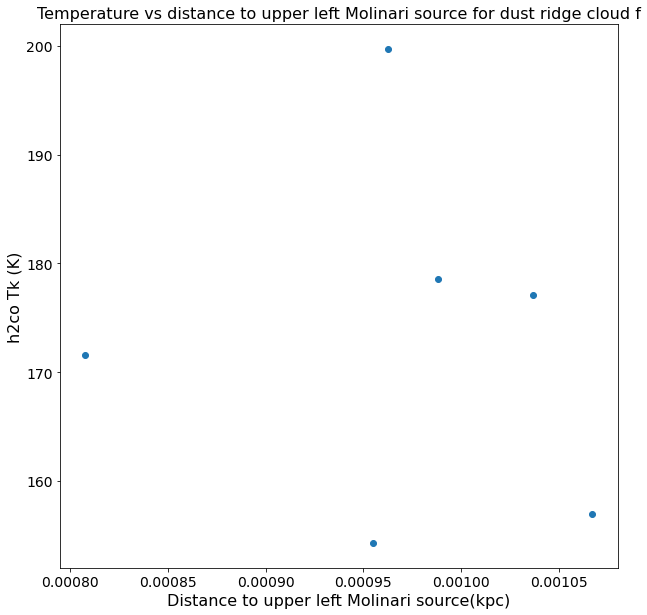

In [96]:
#dust ridge f1 (upper left)
dustridgef_e = (leaf_ID=='G0.489+0.010e')
dustridgef_f = (leaf_ID=='G0.489+0.010f')
dustridgef_g = (leaf_ID=='G0.489+0.010g')
dustridgef_k = (leaf_ID=='G0.489+0.010k')
dustridgef_l = (leaf_ID=='G0.489+0.010l')
#dustridgef_i = (leaf_ID=='G0.489+0.010i') #i is the further one
dustridgef_j = (leaf_ID=='G0.489+0.010j')

#find star forming status for each source 
print(combined_catalog['SF_final_say'][dustridgef_e])
print(combined_catalog['SF_final_say'][dustridgef_f])
print(combined_catalog['SF_final_say'][dustridgef_g])
print(combined_catalog['SF_final_say'][dustridgef_k])
print(combined_catalog['SF_final_say'][dustridgef_l])
#print(combined_catalog['SF_final_say'][dustridgef_i])
print(combined_catalog['SF_final_say'][dustridgef_j])

f1 = apycoords.SkyCoord(0.490*u.deg,-0.028*u.deg,distance=distance,frame='galactic')
fe = apycoords.SkyCoord(glon[dustridgef_e],glat[dustridgef_e],distance=distance,frame='galactic')
ff = apycoords.SkyCoord(glon[dustridgef_f],glat[dustridgef_f],distance=distance,frame='galactic')
fg = apycoords.SkyCoord(glon[dustridgef_g],glat[dustridgef_g],distance=distance,frame='galactic')
fk = apycoords.SkyCoord(glon[dustridgef_k],glat[dustridgef_k],distance=distance,frame='galactic')
fl = apycoords.SkyCoord(glon[dustridgef_l],glat[dustridgef_l],distance=distance,frame='galactic')
#fi = apycoords.SkyCoord(glon[dustridgef_i],glat[dustridgef_i],distance=distance,frame='galactic')
fj = apycoords.SkyCoord(glon[dustridgef_j],glat[dustridgef_j],distance=distance,frame='galactic')


gc_frame= apycoords.Galactocentric(galcen_distance=8.2*u.kpc,
                                   z_sun=25.*u.pc)
gc.representation_type = 'cartesian'

#calculate distances to upper left Molinari source
#print distances to star forming source
print(f1.separation_3d(f1)) 
print(f1.separation_3d(fe)) 
print(f1.separation_3d(ff))
print(f1.separation_3d(fg))
print(f1.separation_3d(fk))
print(f1.separation_3d(fl))
#print(f1.separation_3d(fi))
print(f1.separation_3d(fj))

#print formaldehyde temps
print(Tk[dustridgef_e])
print(Tk[dustridgef_f])
print(Tk[dustridgef_g])
print(Tk[dustridgef_k])
print(Tk[dustridgef_l])
#print(Tk[dustridgef_i])
print(Tk[dustridgef_j])

dustridgef1_dist = [0.00098827, 0.00096249, 0.00095477, 0.00103711, 0.00106737, 0.00080757] 
dustridgef_gastemp = [178.57, 199.71, 154.29, 177.1, 156.93, 171.6]

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(dustridgef1_dist, dustridgef_gastemp)
plt.xlabel('Distance to upper left Molinari source(kpc)', fontsize=16)
plt.ylabel('h2co Tk (K)', fontsize=16)
plt.title('Temperature vs distance to upper left Molinari source for dust ridge cloud f', fontsize=16)
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)



0.0 kpc
[0.00136667] kpc
[0.00130698] kpc
[0.00125592] kpc
[0.00140644] kpc
[0.00143452] kpc
[0.00143899] kpc
    h2co_Tk_0    
        K        
-----------------
179.3542327577321
    h2co_Tk_0     
        K         
------------------
198.76380935726496
    h2co_Tk_0     
        K         
------------------
145.92938267694473
    h2co_Tk_0    
        K        
-----------------
173.6311093415863
    h2co_Tk_0     
        K         
------------------
117.50216777606865
    h2co_Tk_0    
        K        
-----------------
91.80245464855152


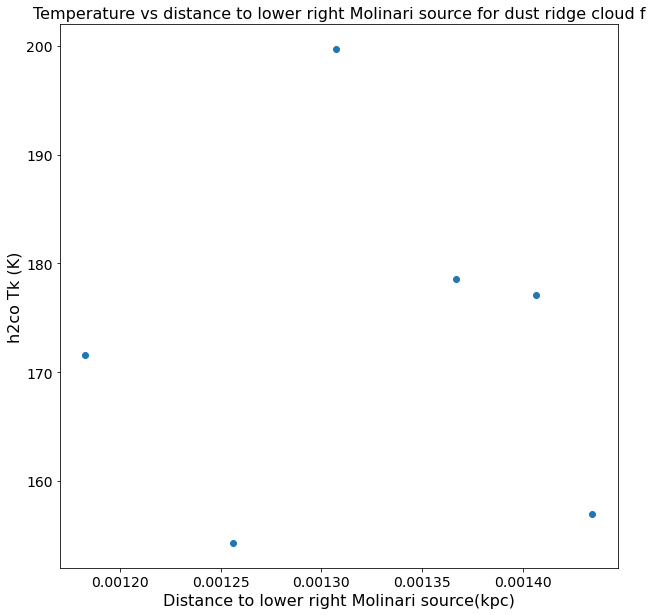

In [97]:
#dust ridge f2 (lower right)

f2 = apycoords.SkyCoord(0.4492*u.deg,-0.026*u.deg,distance=distance,frame='galactic')

gc_frame= apycoords.Galactocentric(galcen_distance=8.2*u.kpc,
                                   z_sun=25.*u.pc)
gc.representation_type = 'cartesian'

#calculate distances to upper left Molinari source
#print distances to star forming source
print(f2.separation_3d(f2)) 
print(f2.separation_3d(fe)) 
print(f2.separation_3d(ff))
print(f2.separation_3d(fg))
print(f2.separation_3d(fk))
print(f2.separation_3d(fl))
#print(f2.separation_3d(fi))
print(f2.separation_3d(fj))

#print formaldehyde temps
print(Tk[dustridgef_e])
print(Tk[dustridgef_f])
print(Tk[dustridgef_g])
print(Tk[dustridgef_k])
print(Tk[dustridgef_l])
#print(Tk[dustridgef_i])
print(Tk[dustridgef_j])

dustridgef2_dist = [0.00136667, 0.00130698, 0.00125592, 0.00140644, 0.00143452, 0.00118274]
dustridgef_gastemp = [178.57, 199.71, 154.29, 177.1, 156.93, 171.6]

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(dustridgef2_dist, dustridgef_gastemp)
plt.xlabel('Distance to lower right Molinari source(kpc)', fontsize=16)
plt.ylabel('h2co Tk (K)', fontsize=16)
plt.title('Temperature vs distance to lower right Molinari source for dust ridge cloud f', fontsize=16)
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)




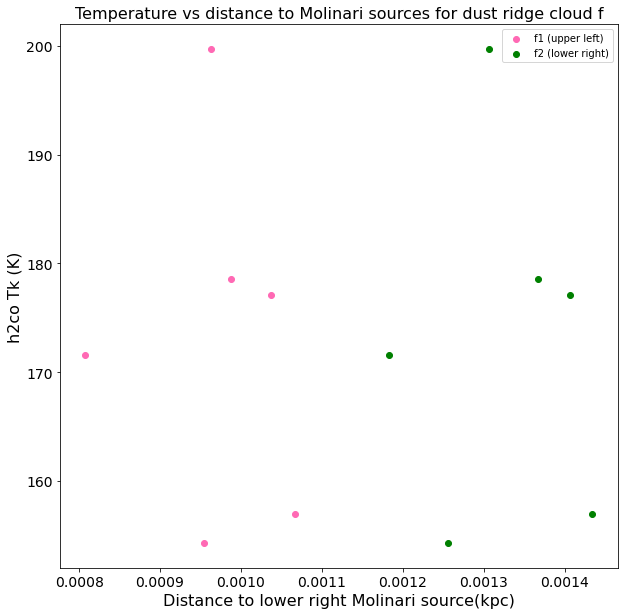

In [98]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(dustridgef1_dist, dustridgef_gastemp, c='hotpink', label='f1 (upper left)')
ax.scatter(dustridgef2_dist, dustridgef_gastemp, c='green', label='f2 (lower right)')
plt.xlabel('Distance to lower right Molinari source(kpc)', fontsize=16)
plt.ylabel('h2co Tk (K)', fontsize=16)
plt.title('Temperature vs distance to Molinari sources for dust ridge cloud f', fontsize=16)
plt.legend()
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)




# Population Studies

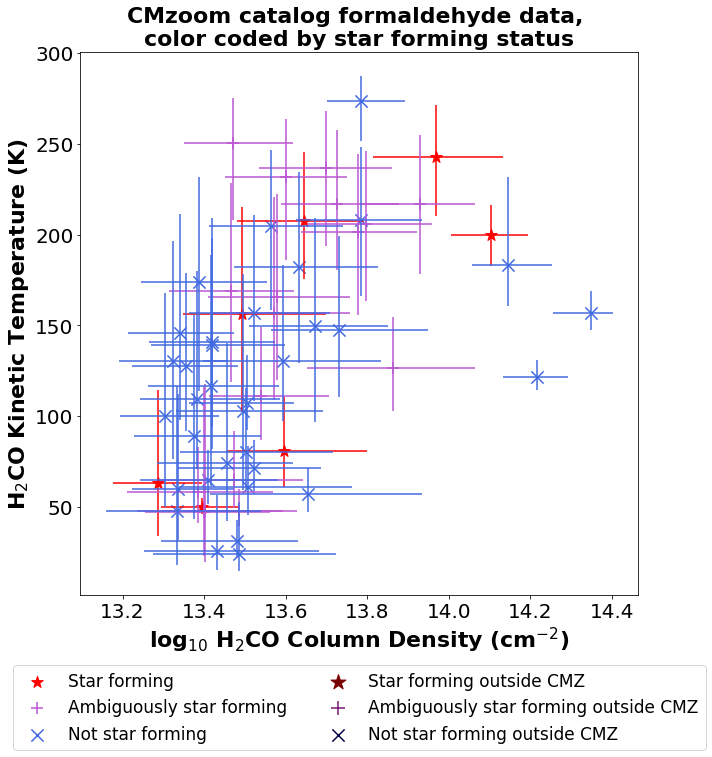

In [103]:
#T vs N
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))
ax.scatter(N[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], Tk[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], s=150, c='red', marker='*', label='Star forming')
ax.scatter(N[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], Tk[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], s=150, c='mediumorchid', marker='+', label='Ambiguously star forming')
ax.scatter(N[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], Tk[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], s=150, c='royalblue', marker='x', label='Not star forming')

ax.scatter(N[starforming_condition1 & not_multi_component & h2co_detection & out], Tk[starforming_condition1 & not_multi_component & h2co_detection & out], c='xkcd:blood', marker='*', label='Star forming outside CMZ', s=250)
ax.scatter(N[starforming_condition2 & not_multi_component & h2co_detection & out], Tk[starforming_condition2 & not_multi_component & h2co_detection & out], c='xkcd:darkish purple', marker='+', label='Ambiguously star forming outside CMZ', s=210)
ax.scatter(N[starforming_condition0 & not_multi_component & h2co_detection & out], Tk[starforming_condition0 & not_multi_component & h2co_detection & out], c='xkcd:night blue', marker='x', label='Not star forming outside CMZ', s=150)

ax.errorbar(N[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], Tk[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ],  yerr =[Tk_unc_neg1[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], Tk_unc_pos1[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ]], xerr = [N_unc_neg1[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], N_unc_pos1[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ]], c='red', ls='none')
ax.errorbar(N[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], Tk[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ],  yerr =[Tk_unc_neg1[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], Tk_unc_pos1[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ]], xerr = [N_unc_neg1[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], N_unc_pos1[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ]], c='mediumorchid', ls='none')
ax.errorbar(N[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], Tk[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ],  yerr =[Tk_unc_neg1[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], Tk_unc_pos1[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ]], xerr = [N_unc_neg1[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], N_unc_pos1[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ]], c='royalblue', ls='none')

#plt.xlim(13.2, 14.5)
plt.xlabel('log$_{10}$ H$_2$CO Column Density (cm$^{-2}$)', fontsize = 22, weight='bold')
plt.ylabel('H$_2$CO Kinetic Temperature (K)', fontsize = 22, weight='bold')
plt.title('CMzoom catalog formaldehyde data, \ncolor coded by star forming status', fontsize = 22, weight='bold')
ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol = 2, fontsize=17)


#apply out of cmzoom mask

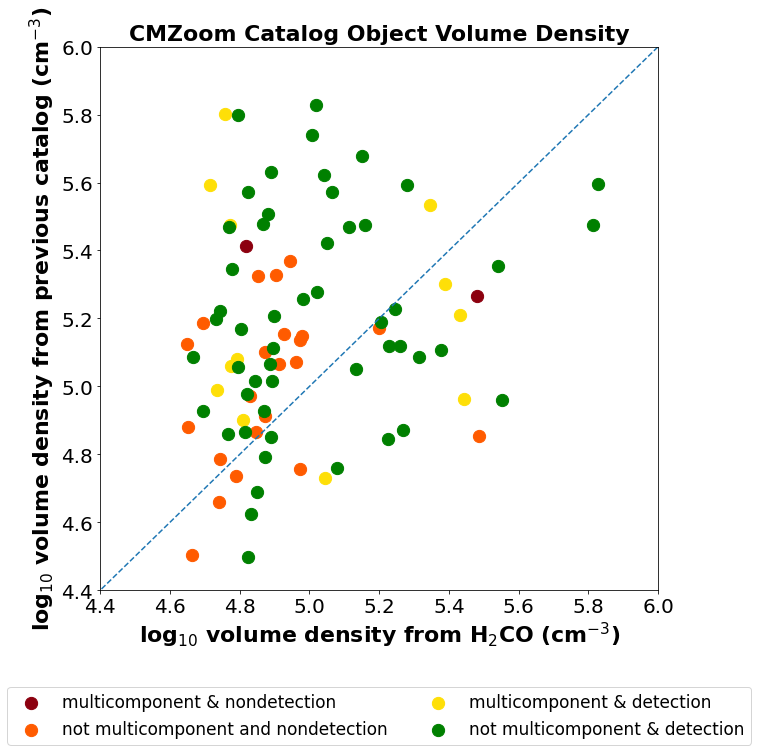

In [105]:
#n vs n
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(nh2co[h2co_mask & multi_component & h2co_nondetection & in_CMZ], np.log10(ncatalog)[h2co_mask& multi_component & h2co_nondetection & in_CMZ], c ='xkcd:crimson', label='multicomponent & nondetection', s=150)
ax.scatter(nh2co[h2co_mask & not_multi_component & h2co_nondetection & in_CMZ], np.log10(ncatalog[h2co_mask & not_multi_component & h2co_nondetection & in_CMZ]), c ='xkcd:bright orange', label='not multicomponent and nondetection', s=150)
ax.scatter(nh2co[h2co_mask & multi_component & h2co_detection & in_CMZ], np.log10(ncatalog[h2co_mask & multi_component & h2co_detection & in_CMZ]), c ='xkcd:dandelion', label='multicomponent & detection', s=150)
ax.scatter(nh2co[h2co_mask & not_multi_component & h2co_detection & in_CMZ], np.log10(ncatalog[h2co_mask& not_multi_component & h2co_detection & in_CMZ]), c ='green', label='not multicomponent & detection', s=150)

# ax.errorbar(nh2co[h2co_mask & multi_component & h2co_nondetection & in_CMZ], np.log10(ncatalog)[h2co_mask& multi_component & h2co_nondetection & in_CMZ], yerr = , c ='xkcd:crimson', label='multicomponent & nondetection', s=150)


# ax.errorbar(nh2co[specific_condition0], np.log10(ncatalog[specific_condition0]),  yerr =[ncatalog_unc[specific_condition0]], xerr = [nh2co_unc_neg[specific_condition0], nh2co_unc_pos[specific_condition0]], c='red', ls='none')
# ax.errorbar(nh2co[specific_condition1], np.log10(ncatalog[specific_condition1]),  yerr =[ncatalog_unc[specific_condition1]], xerr = [nh2co_unc_neg[specific_condition1], nh2co_unc_pos[specific_condition1]], c='orange', ls='none')
# ax.errorbar(nh2co[specific_condition2], np.log10(ncatalog[specific_condition2]),  yerr =[ncatalog_unc[specific_condition2]], xerr = [nh2co_unc_neg[specific_condition2], nh2co_unc_pos[specific_condition2]], c='yellow', ls='none')
# ax.errorbar(nh2co[specific_condition3], np.log10(ncatalog[specific_condition3]),  yerr =[ncatalog_unc[specific_condition3]], xerr = [nh2co_unc_neg[specific_condition3], nh2co_unc_pos[specific_condition3]], c='green', ls='none')

x = np.linspace(0, 10, 100)
y = x
plt.plot(x, y, linestyle='dashed')

plt.xlim(4.4, 6)
plt.ylim(4.4, 6)
plt.xlabel('log$_{10}$ volume density from H$_2$CO (cm$^{-3}$)', fontsize = 22, weight='bold')
plt.ylabel('log$_{10}$ volume density from previous catalog (cm$^{-3}$)', fontsize = 22, weight='bold')
plt.title('CMZoom Catalog Object Volume Density', fontsize = 22, weight='bold')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol = 2, fontsize=17)

ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)


#This result is good to include in the paper discussion- CMZoom IV (star forming) found density thats probably wrong, this is good evidence for that
#Density from formaldehyde is probably much more acccurate 


Text(0.5, 1.0, 'Ratio of h2co density to CMZoom catalog density')

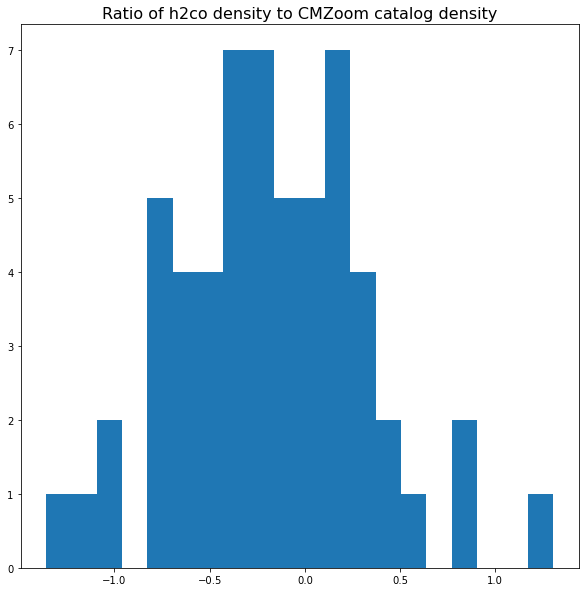

In [106]:
#ratio of n vs n 
n_ratio = 10**(nh2co)/ncatalog
nratio_log = np.log10(n_ratio)
#print(n_ratio)
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))
ax.hist(nratio_log[h2co_mask& not_multi_component & h2co_detection & in_CMZ], bins=20)
# plt.xlim(0.7, 1.3)
# plt.ylim(0, 60)
plt.title('Ratio of h2co density to CMZoom catalog density', fontsize = 16)



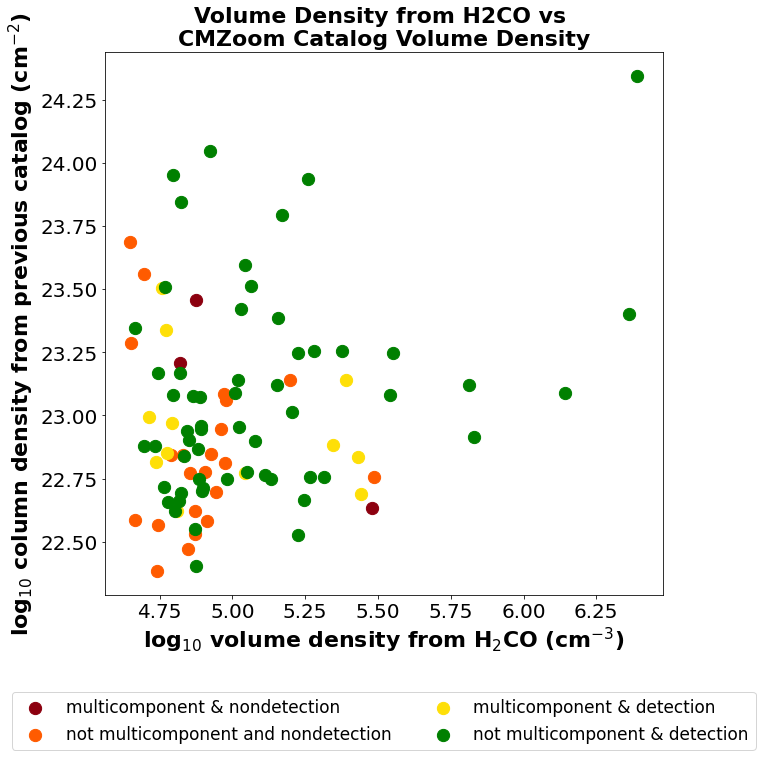

In [108]:
#n vs cmzoom N
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(nh2co[h2co_mask & multi_component & h2co_nondetection & in_CMZ], np.log10(Ncatalog)[h2co_mask& multi_component & h2co_nondetection & in_CMZ], c ='xkcd:crimson', label='multicomponent & nondetection', s=150)
ax.scatter(nh2co[h2co_mask & not_multi_component & h2co_nondetection & in_CMZ], np.log10(Ncatalog[h2co_mask & not_multi_component & h2co_nondetection & in_CMZ]), c ='xkcd:bright orange', label='not multicomponent and nondetection', s=150)
ax.scatter(nh2co[h2co_mask & multi_component & h2co_detection & in_CMZ], np.log10(Ncatalog[h2co_mask & multi_component & h2co_detection & in_CMZ]), c ='xkcd:dandelion', label='multicomponent & detection', s=150)
ax.scatter(nh2co[h2co_mask & not_multi_component & h2co_detection & in_CMZ], np.log10(Ncatalog[h2co_mask& not_multi_component & h2co_detection & in_CMZ]), c ='green', label='not multicomponent & detection', s=150)

# ax.errorbar(nh2co[h2co_mask & multi_component & h2co_nondetection & in_CMZ], np.log10(ncatalog)[h2co_mask& multi_component & h2co_nondetection & in_CMZ], yerr = c ='xkcd:crimson', label='multicomponent & nondetection', s=150)


# ax.errorbar(nh2co[specific_condition0], np.log10(ncatalog[specific_condition0]),  yerr =[ncatalog_unc[specific_condition0]], xerr = [nh2co_unc_neg[specific_condition0], nh2co_unc_pos[specific_condition0]], c='red', ls='none')
# ax.errorbar(nh2co[specific_condition1], np.log10(ncatalog[specific_condition1]),  yerr =[ncatalog_unc[specific_condition1]], xerr = [nh2co_unc_neg[specific_condition1], nh2co_unc_pos[specific_condition1]], c='orange', ls='none')
# ax.errorbar(nh2co[specific_condition2], np.log10(ncatalog[specific_condition2]),  yerr =[ncatalog_unc[specific_condition2]], xerr = [nh2co_unc_neg[specific_condition2], nh2co_unc_pos[specific_condition2]], c='yellow', ls='none')
# ax.errorbar(nh2co[specific_condition3], np.log10(ncatalog[specific_condition3]),  yerr =[ncatalog_unc[specific_condition3]], xerr = [nh2co_unc_neg[specific_condition3], nh2co_unc_pos[specific_condition3]], c='green', ls='none')


# plt.xlim(4.4, 6)
# plt.ylim(4.4, 6)
plt.xlabel('log$_{10}$ volume density from H$_2$CO (cm$^{-3}$)', fontsize = 22, weight='bold')
plt.ylabel('log$_{10}$ column density from previous catalog (cm$^{-2}$)', fontsize = 22, weight='bold')
plt.title('Volume Density from H2CO vs \nCMZoom Catalog Volume Density', fontsize = 22, weight='bold')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol = 2, fontsize=17)

ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)




In [109]:
#messy attempts at finding outside of CMZ sources
outside_CMZ = (combined_catalog['leaf_ID']=='G0.316-0.201a') & (combined_catalog['leaf_ID']=='G0.316-0.201b') & (combined_catalog['leaf_ID']=='G0.316-0.201c') & (combined_catalog['leaf_ID']=='G0.316-0.201d')&(combined_catalog['leaf_ID']=='G0.316-0.201e')&(combined_catalog['leaf_ID']=='G0.316-0.201f')&(combined_catalog['leaf_ID']=='G0.316-0.201g')&(combined_catalog['leaf_ID']=='G0.316-0.201h')&(combined_catalog['leaf_ID']=='G0.316-0.201i')&(combined_catalog['leaf_ID']=='G0.316-0.201j')&(combined_catalog['leaf_ID']=='G0.316-0.201k')&(combined_catalog['leaf_ID']=='G0.316-0.201l')

outside_CMZa = (combined_catalog['leaf_ID']=='G0.316-0.201a') 
outside_CMZb = (combined_catalog['leaf_ID']=='G0.316-0.201b')
outside_CMZc = (combined_catalog['leaf_ID']=='G0.316-0.201c')
outside_CMZd = (combined_catalog['leaf_ID']=='G0.316-0.201d')
outside_CMZe = (combined_catalog['leaf_ID']=='G0.316-0.201e')
outside_CMZf = (combined_catalog['leaf_ID']=='G0.316-0.201f')
outside_CMZg = (combined_catalog['leaf_ID']=='G0.316-0.201g')
outside_CMZh = (combined_catalog['leaf_ID']=='G0.316-0.201h')
outside_CMZi = (combined_catalog['leaf_ID']=='G0.316-0.201i')
outside_CMZj = (combined_catalog['leaf_ID']=='G0.316-0.201j')
outside_CMZk = (combined_catalog['leaf_ID']=='G0.316-0.201k')
outside_CMZl = (combined_catalog['leaf_ID']=='G0.316-0.201l')

# print(outside_CMZa, outside_CMZb, outside_CMZc, 
#      outside_CMZd, outside_CMZe, outside_CMZf,
#      outside_CMZg, outside_CMZh, outside_CMZi, 
#      outside_CMZj, outside_CMZk, outside_CMZl)
# #b c d e  h i j l
# print(combined_catalog['SF_final_say'][outside_CMZb], combined_catalog['SF_final_say'][outside_CMZc], 
#      combined_catalog['SF_final_say'][outside_CMZd], combined_catalog['SF_final_say'][outside_CMZe],
#      combined_catalog['SF_final_say'][outside_CMZh], combined_catalog['SF_final_say'][outside_CMZi], 
#      combined_catalog['SF_final_say'][outside_CMZj], combined_catalog['SF_final_say'][outside_CMZl])


Tk_outside1 = [Tk[outside_CMZb], Tk[outside_CMZc], Tk[outside_CMZd], Tk[outside_CMZh], Tk[outside_CMZi], Tk[outside_CMZj]]
Tk_outside0 = [Tk[outside_CMZe]]
Tk_outside2 = [Tk[outside_CMZl]]  
Tdust_outside1 = [Tdust[outside_CMZb], Tdust[outside_CMZc], Tdust[outside_CMZd], Tdust[outside_CMZh], Tdust[outside_CMZi], Tdust[outside_CMZj]]
Tdust_outside0 = [Tdust[outside_CMZe]]
Tdust_outside2 = [Tdust[outside_CMZl]]   

In [110]:
# print(combined_catalog['leaf_ID'][combined_catalog['mask_num']==27]) #sag astar
# print(combined_catalog['leaf_ID'][combined_catalog['mask_num']==13]) 
# print(combined_catalog['leaf_ID'][combined_catalog['mask_num']==17])
# print(combined_catalog['leaf_ID'][combined_catalog['mask_num']==33])

In [111]:
# #gas vs dust temp
# fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

# ax.scatter(Tdust[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], Tk[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], c='red', marker='*', label='Star forming', s=250)
# ax.scatter(Tdust[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], Tk[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], c='xkcd:barney', marker='+', label='Ambiguously star forming', s=210)
# ax.scatter(Tdust[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], Tk[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], c='xkcd:cerulean', marker='x', label='Not star forming', s=150)

# # ax.scatter(Tdust_outside1, Tk_outside1, c='xkcd:blood', marker='*', label='Star forming outside CMZ', s=250)
# # ax.scatter(Tdust_outside2, Tk_outside2, c='xkcd:darkish purple', marker='+', label='Ambiguously star forming outside CMZ', s=210)
# # ax.scatter(Tdust_outside0, Tk_outside0, c='xkcd:night blue', marker='x', label='Not star forming outside CMZ', s=150)

# # ax.errorbar(Tdust[starforming_condition1&specific_condition3&h2co_mask], Tk[starforming_condition1&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition1&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition1&specific_condition3&h2co_mask]], c='red', ls='none')
# # ax.errorbar(Tdust[starforming_condition2&specific_condition3&h2co_mask], Tk[starforming_condition2&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition2&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition2&specific_condition3&h2co_mask]], c='mediumorchid', ls='none')
# # ax.errorbar(Tdust[starforming_condition0&specific_condition3&h2co_mask], Tk[starforming_condition0&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition0&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition0&specific_condition3&h2co_mask]], c='royalblue', ls='none')

# # ax.scatter(Tdust[starforming_condition1 & h2co_mask & not_multi_component & h2co_detection& out], Tk[starforming_condition1 & h2co_mask & not_multi_component & h2co_detection & out], c='pink', marker='*', label='Star forming out', s=250)
# # ax.scatter(Tdust[starforming_condition2 & h2co_mask & not_multi_component & h2co_detection & out], Tk[starforming_condition2 & h2co_mask & not_multi_component & h2co_detection & out], c='xkcd:violet', marker='+', label='out Ambiguously star forming', s=210)
# # ax.scatter(Tdust[starforming_condition0 & h2co_mask & not_multi_component & h2co_detection &out], Tk[starforming_condition0 & h2co_mask & not_multi_component & h2co_detection& out], c='xkcd:blue', marker='x', label='out Not star forming', s=150)




# # plt.xlim(4.4, 6)
# plt.ylim(3, 300)
# plt.xlabel('Dust Temperature from CMZoom Catalog (K)', fontsize = 22, weight='bold')
# plt.ylabel('Formaldehyde Gas Temperature (K)', fontsize = 22, weight='bold')
# plt.title('CMzoom catalog objects gas vs dust temps', fontsize = 22, weight='bold')

# ax.tick_params(axis='x',labelsize=20)
# ax.tick_params(axis='y',labelsize=20)

# pos = ax.get_position()
# ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
# ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol = 2, fontsize=17)
# #one array is one longer or one shorter

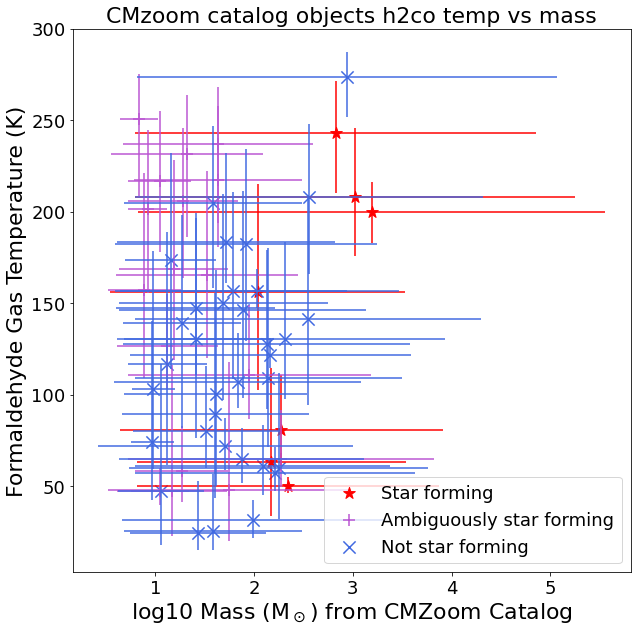

In [32]:
#gas temp vs mass
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(np.log10(mass[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ]), Tk[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], s = 150, c='red', marker='*', label='Star forming')
ax.scatter(np.log10(mass[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ]), Tk[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], s = 150, c='mediumorchid', marker='+', label='Ambiguously star forming')
ax.scatter(np.log10(mass[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ]), Tk[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], s = 150,c='royalblue', marker='x', label='Not star forming')

ax.errorbar(np.log10(mass[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ]), Tk[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], yerr =[Tk_unc_neg1[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], Tk_unc_pos1[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ]], xerr = [np.log10(mass_unc[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ])], c='red', ls='none')
ax.errorbar(np.log10(mass[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ]), Tk[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], yerr =[Tk_unc_neg1[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], Tk_unc_pos1[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ]], xerr = [np.log10(mass_unc[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ])], c='mediumorchid', ls='none')
ax.errorbar(np.log10(mass[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ]), Tk[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], yerr =[Tk_unc_neg1[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], Tk_unc_pos1[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ]], xerr = [np.log10(mass_unc[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ])], c='royalblue', ls='none')


# ax.errorbar(np.log10(mass[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ]), Tk[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], s = 150, c='mediumorchid', marker='+', label='Ambiguously star forming')
# ax.errorbar(np.log10(mass[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ]), Tk[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], s = 150,c='royalblue', marker='x', label='Not star forming')


# ax.errorbar(np.log10(mass[starforming_condition1&specific_condition3&h2co_mask]), Tk[starforming_condition1&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition1&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition1&specific_condition3&h2co_mask]], xerr = [np.log10(mass_unc[starforming_condition1&specific_condition3&h2co_mask])], c='red', ls='none')
# ax.errorbar(np.log10(mass[starforming_condition2&specific_condition3&h2co_mask]), Tk[starforming_condition2&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition2&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition2&specific_condition3&h2co_mask]], xerr = [np.log10(mass_unc[starforming_condition2&specific_condition3&h2co_mask])], c='mediumorchid', ls='none')
# ax.errorbar(np.log10(mass[starforming_condition0&specific_condition3&h2co_mask]), Tk[starforming_condition0&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition0&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition0&specific_condition3&h2co_mask]], xerr = [np.log10(mass_unc[starforming_condition0&specific_condition3&h2co_mask])], c='royalblue', ls='none')

plt.ylim(3, 300)
plt.xlabel('log10 Mass (M$_\odot$) from CMZoom Catalog', fontsize = 22)
plt.ylabel('Formaldehyde Gas Temperature (K)', fontsize = 22)
plt.title('CMzoom catalog objects h2co temp vs mass', fontsize = 22)

ax.tick_params(axis='x',labelsize=18)
ax.tick_params(axis='y',labelsize=18)
ax.legend(loc='best', fontsize=18)
#dont use these uncertainties for mass 
#make gluevis plot on cmz color coded by temp 

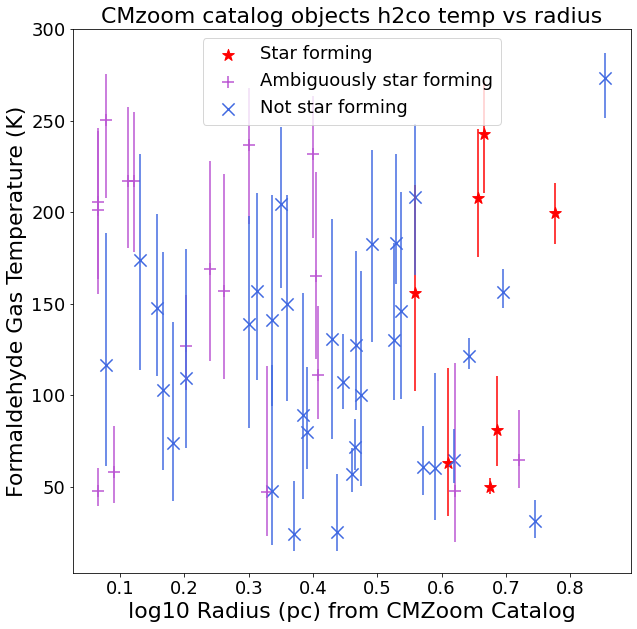

In [33]:
#gas temp vs radius
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(np.log10(radius[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ]), Tk[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], s=150, c='red', marker='*', label='Star forming')
ax.scatter(np.log10(radius[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ]), Tk[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], s=150, c='mediumorchid', marker='+', label='Ambiguously star forming')
ax.scatter(np.log10(radius[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ]), Tk[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], s=150, c='royalblue', marker='x', label='Not star forming')

ax.errorbar(np.log10(radius[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ]), Tk[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], yerr =[Tk_unc_neg1[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], Tk_unc_pos1[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ]], c='red', ls='none')
ax.errorbar(np.log10(radius[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ]), Tk[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], yerr =[Tk_unc_neg1[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], Tk_unc_pos1[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ]], c='mediumorchid', ls='none')
ax.errorbar(np.log10(radius[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ]), Tk[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], yerr =[Tk_unc_neg1[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], Tk_unc_pos1[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ]], c='royalblue', ls='none')


plt.ylim(3, 300)
plt.xlabel('log10 Radius (pc) from CMZoom Catalog', fontsize = 22)
plt.ylabel('Formaldehyde Gas Temperature (K)', fontsize = 22)
plt.title('CMzoom catalog objects h2co temp vs radius', fontsize = 22)

ax.tick_params(axis='x',labelsize=18)
ax.tick_params(axis='y',labelsize=18)
ax.legend(loc='best', fontsize=18)



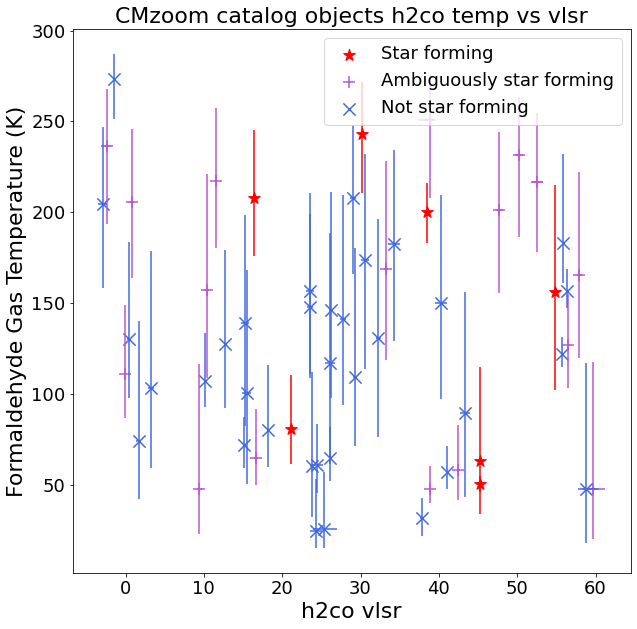

In [34]:
#gas temp vs vlsr
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(vlsr[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], Tk[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], s=150, c='red', marker='*', label='Star forming')
ax.scatter(vlsr[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], Tk[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], s=150, c='mediumorchid', marker='+', label='Ambiguously star forming')
ax.scatter(vlsr[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], Tk[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], s=150, c='royalblue', marker='x', label='Not star forming')

ax.errorbar(vlsr[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], Tk[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], yerr =[Tk_unc_neg1[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], Tk_unc_pos1[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ]], xerr = [vlsr_unc_neg1[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], vlsr_unc_pos1[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ]], c='red', ls='none')
ax.errorbar(vlsr[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], Tk[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], yerr =[Tk_unc_neg1[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], Tk_unc_pos1[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ]], xerr = [vlsr_unc_neg1[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], vlsr_unc_pos1[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ]], c='mediumorchid', ls='none')
ax.errorbar(vlsr[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], Tk[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], yerr =[Tk_unc_neg1[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], Tk_unc_pos1[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ]], xerr = [vlsr_unc_neg1[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], vlsr_unc_pos1[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ]], c='royalblue', ls='none')

# plt.ylim(3, 300)
plt.xlabel('h2co vlsr', fontsize = 22)
plt.ylabel('Formaldehyde Gas Temperature (K)', fontsize = 22)
plt.title('CMzoom catalog objects h2co temp vs vlsr', fontsize = 22)

ax.tick_params(axis='x',labelsize=18)
ax.tick_params(axis='y',labelsize=18)
ax.legend(loc='best', fontsize=18)



In [26]:
# #dust temp vs vlsr
# fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

# ax.scatter(vlsr[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], Tdust[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], c='red', marker='*', label='Star forming')
# ax.scatter(vlsr[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], Tdust[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], c='mediumorchid', marker='+', label='Ambiguously star forming')
# ax.scatter(vlsr[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], Tdust[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], c='royalblue', marker='x', label='Not star forming')

# # ax.errorbar(vlsr[starforming_condition1&specific_condition3&h2co_mask], Tdust[starforming_condition1&specific_condition3&h2co_mask], xerr = [vlsr_unc_neg[starforming_condition1&specific_condition3&h2co_mask], vlsr_unc_pos[starforming_condition1&specific_condition3&h2co_mask]], c='red', ls='none')
# # ax.errorbar(vlsr[starforming_condition2&specific_condition3&h2co_mask], Tdust[starforming_condition2&specific_condition3&h2co_mask], xerr = [vlsr_unc_neg[starforming_condition2&specific_condition3&h2co_mask], vlsr_unc_pos[starforming_condition2&specific_condition3&h2co_mask]], c='mediumorchid', ls='none')
# # ax.errorbar(vlsr[starforming_condition0&specific_condition3&h2co_mask], Tdust[starforming_condition0&specific_condition3&h2co_mask], xerr = [vlsr_unc_neg[starforming_condition0&specific_condition3&h2co_mask], vlsr_unc_pos[starforming_condition0&specific_condition3&h2co_mask]], c='royalblue', ls='none')

# # plt.ylim(3, 300)
# plt.xlabel('h2co vlsr', fontsize = 16)
# plt.ylabel('Dust Temperature (K)', fontsize = 16)
# plt.title('CMzoom catalog objects dust temp vs vlsr', fontsize = 16)

# ax.tick_params(axis='x',labelsize=14)
# ax.tick_params(axis='y',labelsize=14)
# ax.legend(loc='best')



In [27]:
# #Diff between gas and dust temp vs density 
# fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

# ax.scatter(nh2co[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], gas_dust_T_diff[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], c='red', marker='*', label='Star forming')
# ax.scatter(nh2co[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], gas_dust_T_diff[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], c='mediumorchid', marker='+', label='Ambiguously star forming')
# ax.scatter(nh2co[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], gas_dust_T_diff[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], c='royalblue', marker='x', label='Not star forming')

# plt.ylim(0, 250)
# plt.xlabel('h2co density', fontsize = 16)
# plt.ylabel('Difference between Gas and Dust Temperature (K)', fontsize = 16)
# plt.title('Difference between gas and dust temp vs density ', fontsize = 16)

# ax.tick_params(axis='x',labelsize=14)
# ax.tick_params(axis='y',labelsize=14)
# ax.legend(loc='best')


In [28]:
# #Ratio between gas and dust temp vs density 
# fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

# ax.scatter(nh2co[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], gas_dust_T_ratio[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ], c='red', marker='*', label='Star forming')
# ax.scatter(nh2co[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], gas_dust_T_ratio[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ], c='mediumorchid', marker='+', label='Ambiguously star forming')
# ax.scatter(nh2co[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], gas_dust_T_ratio[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ], c='royalblue', marker='x', label='Not star forming')

# plt.ylim(0, 14)
# plt.xlabel('h2co density', fontsize = 16)
# plt.ylabel('Ratio between Gas and Dust Temperature (K)', fontsize = 16)
# plt.title('Ratio between gas and dust temp vs density ', fontsize = 16)

# ax.tick_params(axis='x',labelsize=14)
# ax.tick_params(axis='y',labelsize=14)
# ax.legend(loc='best')


In [29]:
#Diff between gas and dust temp histogram
# fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))
# ax.hist(gas_dust_T_diff[not_multi_component & h2co_detection & in_CMZ], bins=15)
# plt.title('Difference between gas and dust temp histogram', fontsize = 22, weight='bold')
# ax.tick_params(axis='x',labelsize=20)
# ax.tick_params(axis='y',labelsize=20)

In [30]:
#Ratio between gas and dust temp histogram
# fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))
# ax.hist(gas_dust_T_ratio[not_multi_component & h2co_detection & in_CMZ], bins=15)
# plt.title('Ratio between gas and dust temp histogram', fontsize = 22, weight='bold')



Text(0.5, 1.0, 'h2co temp histogram')

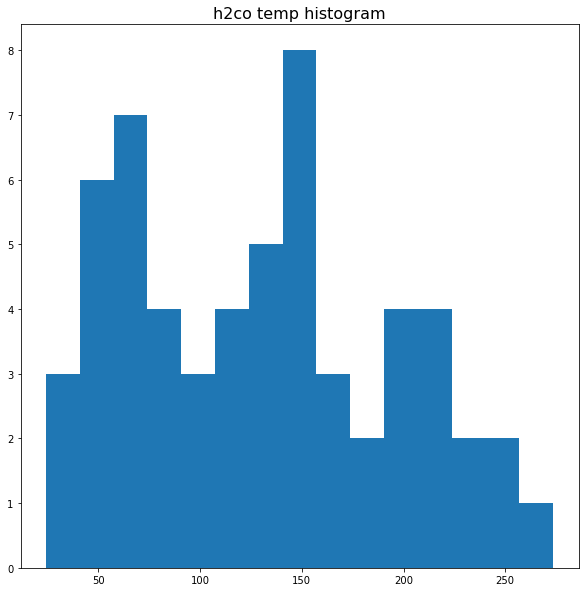

In [31]:
#Gas temp histogram
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))
ax.hist(Tk[not_multi_component & h2co_detection & in_CMZ], bins=15)
plt.title('h2co temp histogram', fontsize = 16)